# Plotting routine for the March 23 2023 event - WIND

In [1]:
test = 'test'

In [24]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pickle as p

import datetime as datetime
from datetime import timedelta
import seaborn as sns
import pandas as pd
from pandas.plotting import table
import os
#import copy as cp

import multiprocessing
import py3dcore_h4c as py3dcore_h4c

import py3dcore_h4c.fluxplot as fp

#plt.switch_backend('agg')


import warnings
warnings.filterwarnings('ignore')

import logging

logging.basicConfig(level=logging.INFO)
logging.getLogger("heliosat.spice").setLevel("WARNING")
logging.getLogger("heliosat.spacecraft").setLevel("WARNING")
#logging.getLogger("sunpy").setLevel("WARNING")
#logging.getLogger("py3dcore_h4c.fluxplot").setLevel("WARNING")

#print(sns.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### setting the times for py3DCORE_h4c

In [25]:
t_launch = datetime.datetime(2023, 3, 20, 7, tzinfo=datetime.timezone.utc) # 

t_s = datetime.datetime(2023, 3, 23, 17, tzinfo=datetime.timezone.utc) 
t_e = datetime.datetime(2023, 3, 24, 15, tzinfo=datetime.timezone.utc)

t_fit = [
        datetime.datetime(2023, 3, 23, 18, tzinfo=datetime.timezone.utc),
        datetime.datetime(2023, 3, 23, 20, tzinfo=datetime.timezone.utc),
        datetime.datetime(2023, 3, 23, 22, tzinfo=datetime.timezone.utc),
        datetime.datetime(2023, 3, 24, 2, tzinfo=datetime.timezone.utc)
]

In [26]:
fittingPoints = []

fittingPoints = [t_fit[i].strftime("%m/%d/%Y, %H:%M:%S") for i in range(len(t_fit))]
print(fittingPoints)

['03/23/2023, 18:00:00', '03/23/2023, 20:00:00', '03/23/2023, 22:00:00', '03/24/2023, 02:00:00']


#### loading the pickle files

In [30]:
path = 'output/wind23032023_heeq_512_fullRestrParams_2/'

filepath = fp.loadpickle(path, number = -1)

In [31]:
filepath[:-7]

'output/wind23032023_heeq_512_fullRestrParams_2/07'


#### extracting parameters

In [32]:
res, allres, ind, meanparams = fp.get_params(filepath, give_mineps=True)

INFO:py3dcore_h4c.fluxplot:Retrieved the following parameters for the run with minimum epsilon:
INFO:py3dcore_h4c.fluxplot: --lon:  -11.58
INFO:py3dcore_h4c.fluxplot: --lat:  -13.39
INFO:py3dcore_h4c.fluxplot: --inc:  107.33
INFO:py3dcore_h4c.fluxplot: --diameter 1 AU:  0.20
INFO:py3dcore_h4c.fluxplot: --aspect ratio:  2.27
INFO:py3dcore_h4c.fluxplot: --launch radius:  15.85
INFO:py3dcore_h4c.fluxplot: --launch speed:  566.00
INFO:py3dcore_h4c.fluxplot: --t factor:  230.20
INFO:py3dcore_h4c.fluxplot: --expansion rate:  1.14
INFO:py3dcore_h4c.fluxplot: --magnetic field decay rate:  1.64
INFO:py3dcore_h4c.fluxplot: --magnetic field 1 AU:  22.48
INFO:py3dcore_h4c.fluxplot: --drag coefficient:  0.76
INFO:py3dcore_h4c.fluxplot: --background sw speed:  419.37


In [33]:
print(meanparams)

[ 0.0000000e+00 -1.1906469e+01 -2.2287823e+01  1.1720197e+02
  2.3965116e-01  2.5932417e+00  1.4955767e+01  5.8328845e+02
  2.2743730e+02  1.1400080e+00  1.6400100e+00  2.2402626e+01
  1.0988808e+00  4.3794806e+02]


In [34]:
out = fp.get_ensemble_stats(filepath)

In [35]:
out.describe()

,lon,lat,inc,D1AU,delta,launch radius,launch speed,t factor,B1AU,gamma,vsw
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,-11.906473,-22.287819,117.202011,0.239651,2.593242,14.955759,583.288208,227.437225,22.402634,1.098881,437.948059
std,6.794765,8.105057,8.278597,0.040118,0.717399,0.533964,55.185955,13.568032,3.562314,0.486382,33.390850
min,-31.048267,-39.566429,100.057076,0.141937,1.062439,14.000337,500.172211,200.040390,15.496161,0.218096,309.770844
25%,-16.266460,-28.586204,111.484169,0.209769,2.045057,14.529284,536.052963,215.739639,19.700224,0.693634,420.380630
50%,-11.535637,-22.814207,116.633209,0.236145,2.600693,14.900311,576.382812,228.417511,21.982662,1.090959,440.661880
75%,-6.433123,-15.736559,122.927998,0.268814,3.166140,15.391155,626.905899,238.706757,24.509221,1.471847,455.965118
max,-0.091310,-2.207209,145.322983,0.347758,3.985674,15.999394,698.709351,249.925552,35.309811,1.993468,547.963318


In [36]:
# write output of describe() to csv-file
out.describe().to_csv(filepath+'parameters.csv')

# write parameters of whole ensemble to txt-file
with open(filepath+'parameters_ensemble.txt', 'a') as f:
    dfAsString = out.to_string(header=True, index=True)
    f.write(dfAsString)


In [37]:
names = ['lon: ', 'lat: ', 'inc: ', 'diameter 1 AU: ', 'aspect ratio: ', 'launch radius: ', 'launch speed: ', 
         't factor: ', 'expansion rate: ', 'magnetic field decay rate: ', 'magnetic field 1 AU: ', 'drag coefficient: ', 
         'background sw speed: ']
 
# write output of describe() to txt-file    
with open(filepath+'parameters_summary.txt', 'a') as f:
    dfAsString = out.describe().to_string(header=True, index=True)
    f.write(dfAsString)   
    f.write('\n')
    f.write('Fitting points:')
    f.write(str(fittingPoints))
    f.write('\n')
    f.write('Parameters for run with min(eps):')
    f.write('\n')
    for count, name in enumerate(names):
        f.write(" --{} {:.2f}".format(name, res[count+1]))
        f.write('\n')

#### loading and plotting the fitting results

In [38]:
t_s = datetime.datetime(2023, 3, 23, 5, tzinfo=datetime.timezone.utc) 
t_e = datetime.datetime(2023, 3, 24, 20, tzinfo=datetime.timezone.utc)

INFO:py3dcore_h4c.fluxplot:No iparams_arr given, using parameters for run with minimum eps.
INFO:py3dcore_h4c.fitter.base:Using custom datafile: wind_2023mar.p


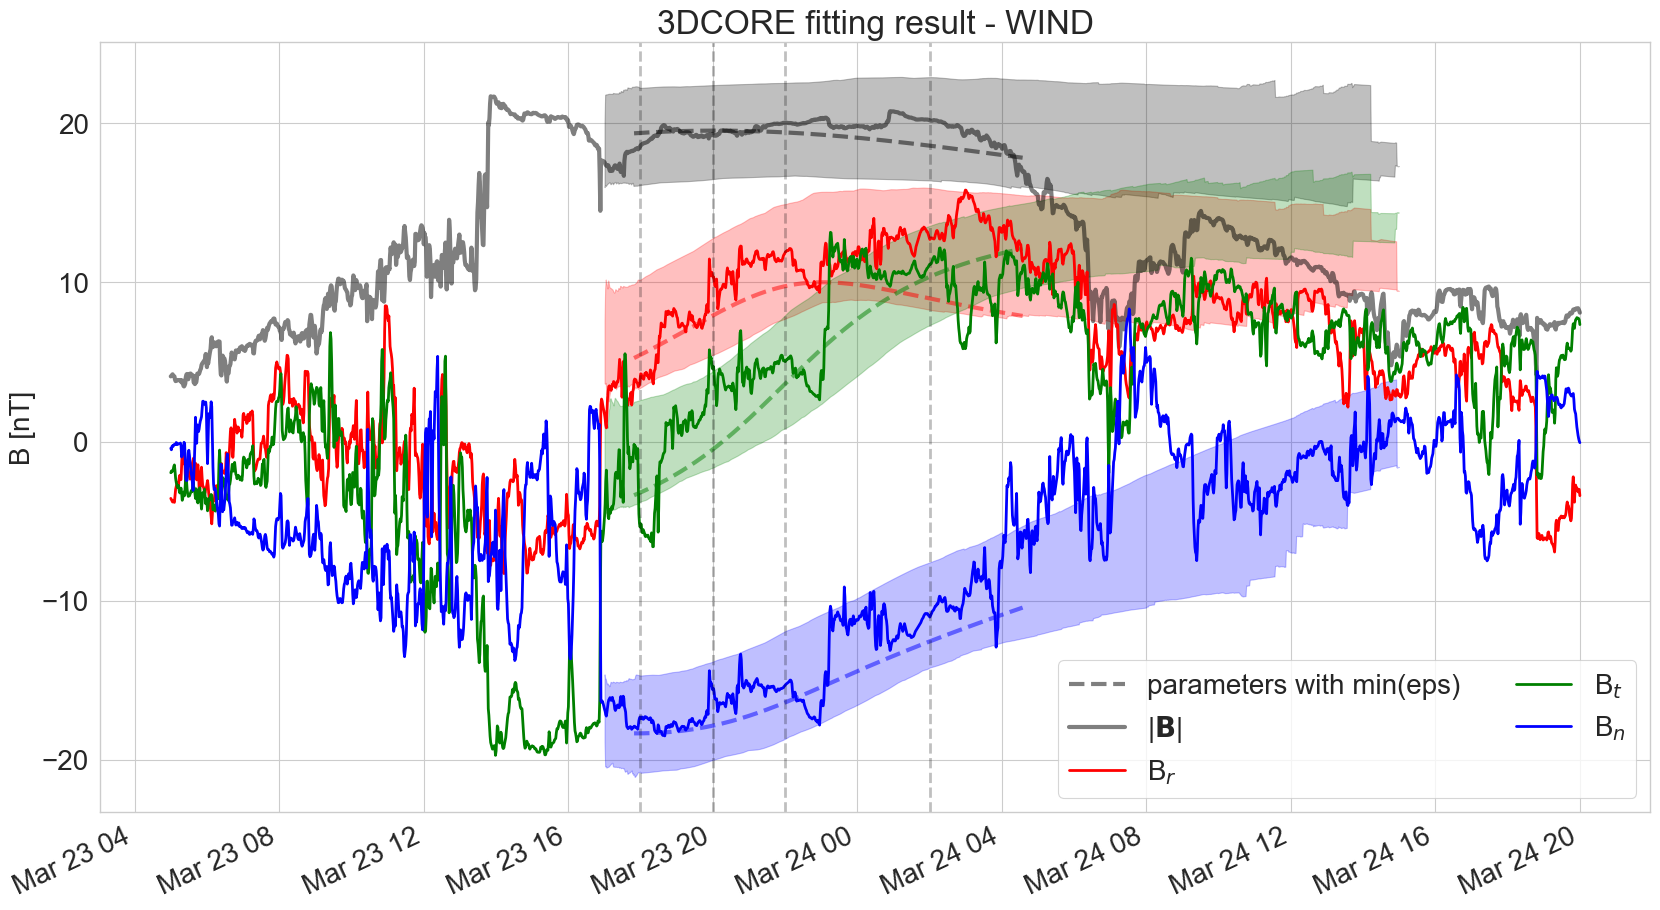

In [39]:
fp.fullinsitu(observer='wind', t_fit=t_fit, start=t_s, end=t_e, filepath=filepath, custom_data='wind_2023mar.p', best=True, ensemble=True, 
              mean=False, save_fig=True, legend=True, fixed=None, max_index=512, title=True, fit_points=True)

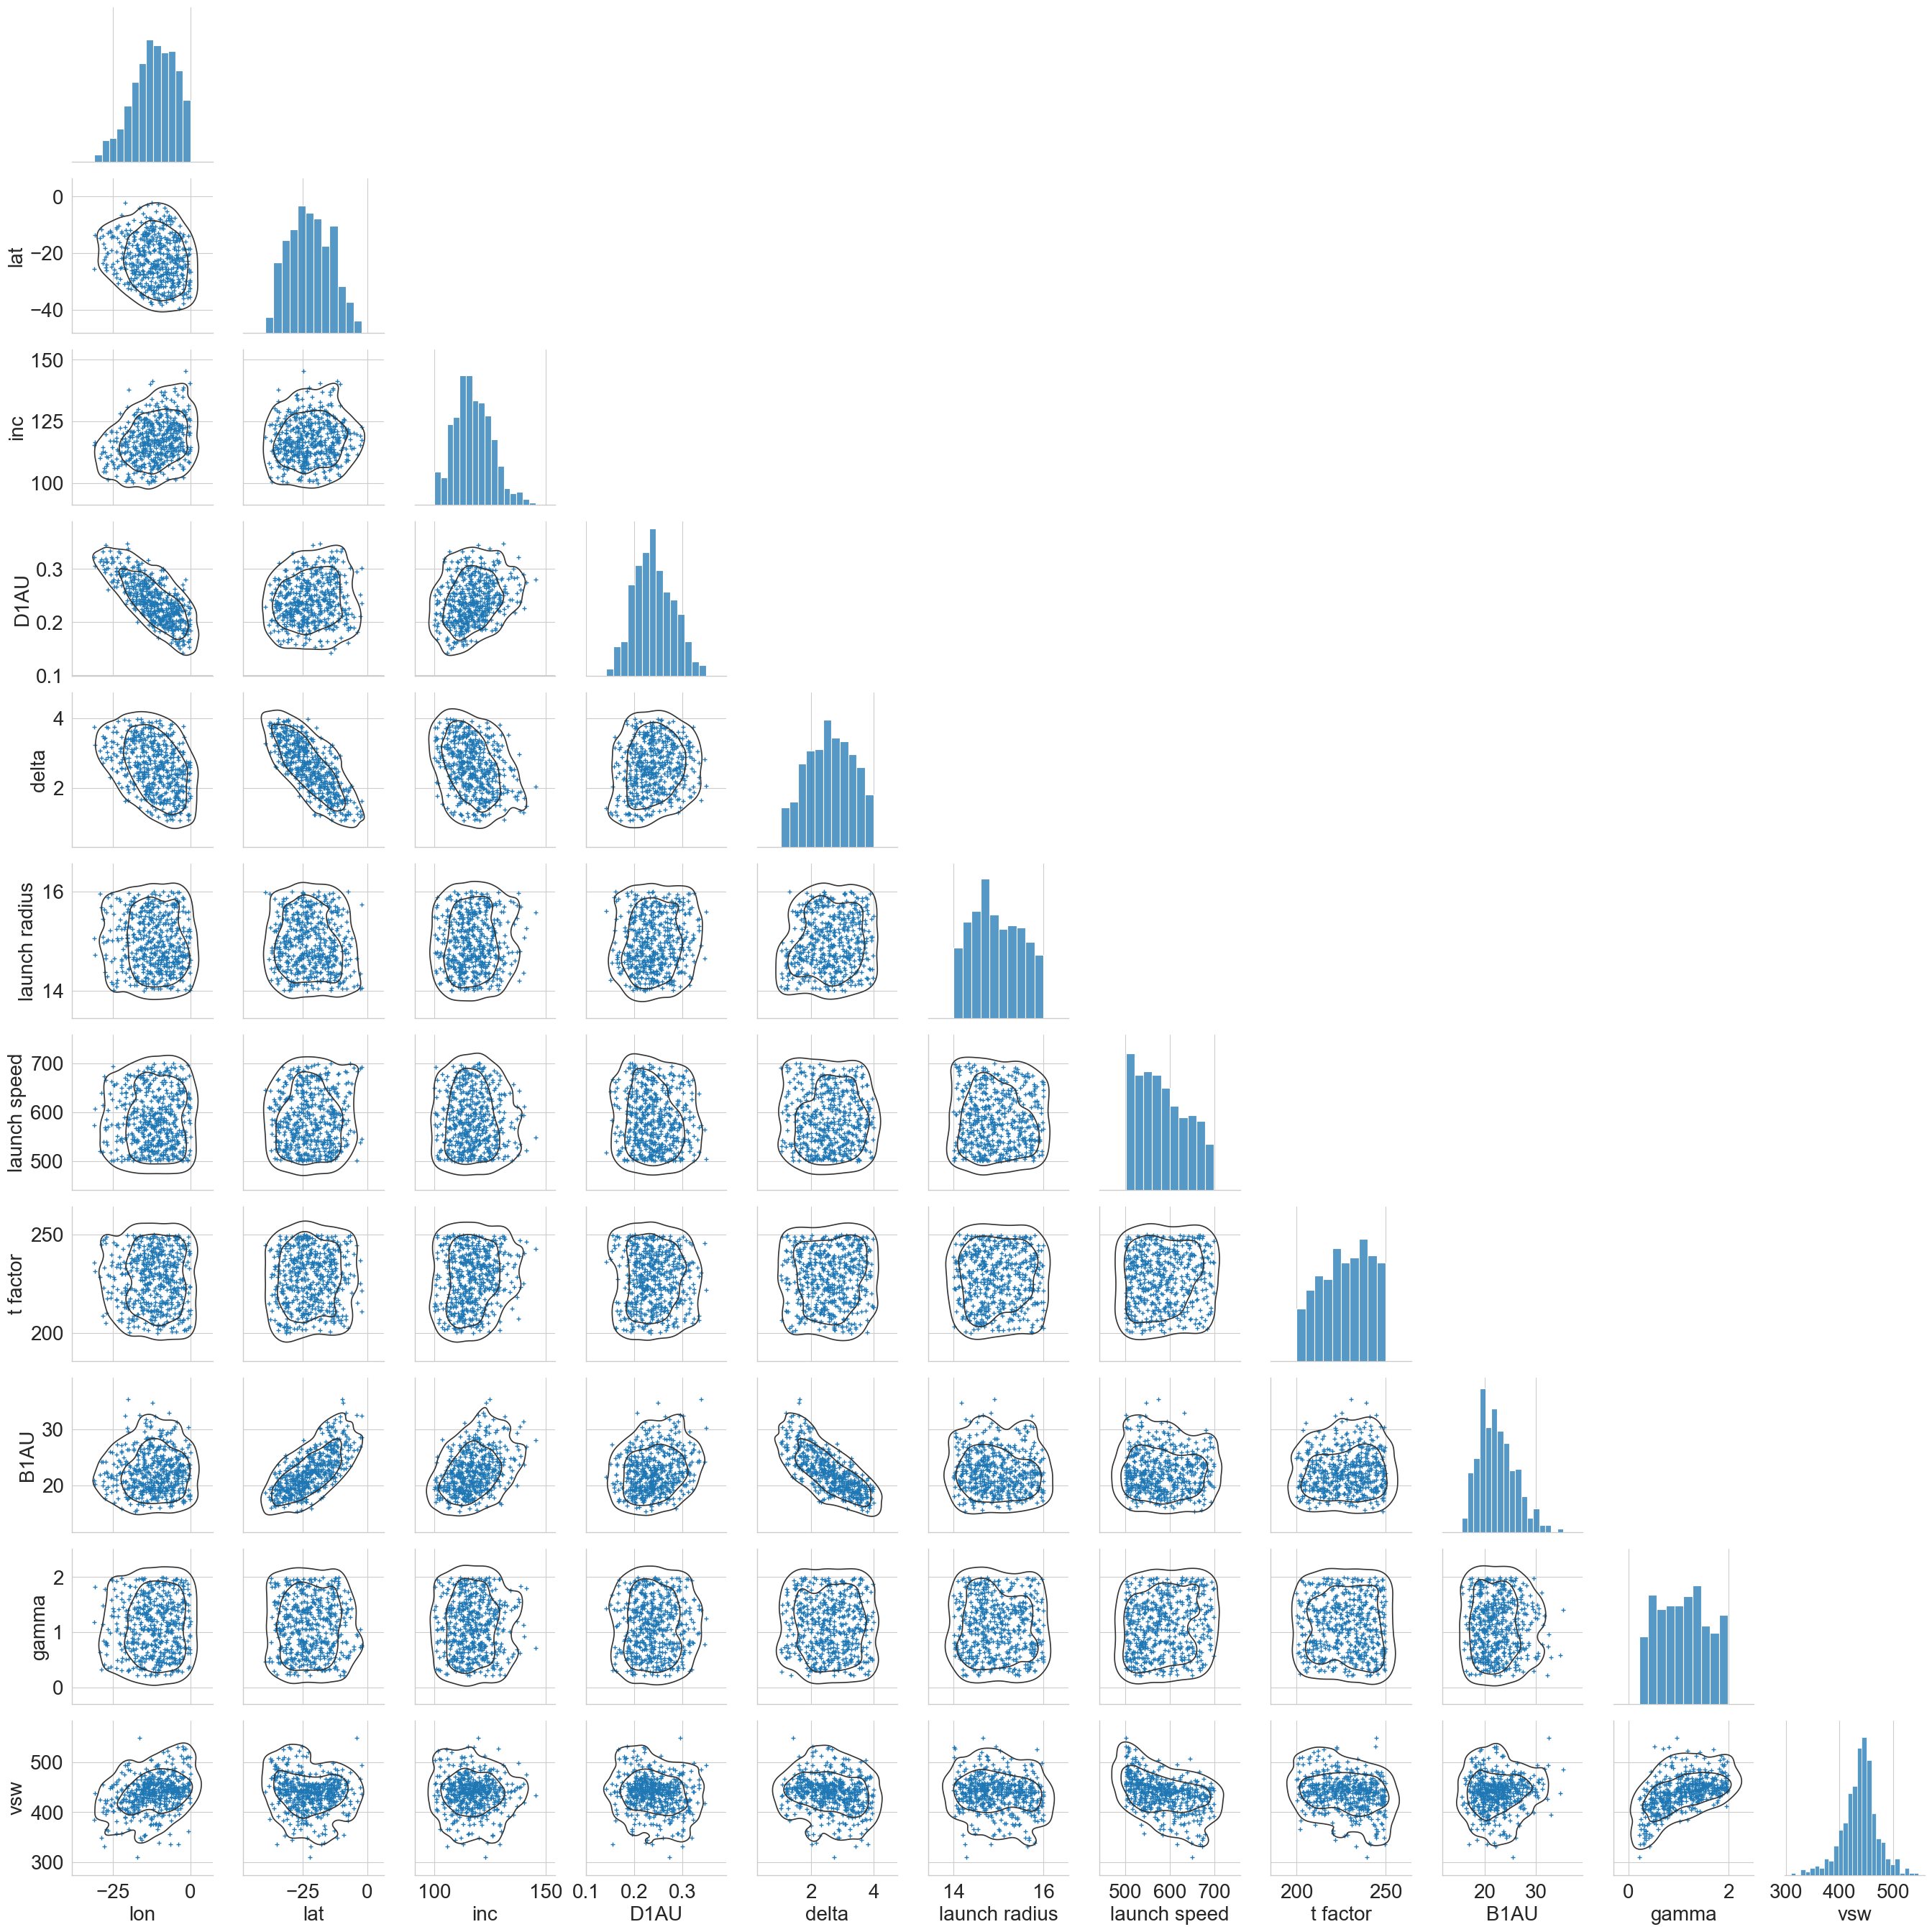

In [ ]:
fp.scatterparams(filepath)

In [ ]:
print(out['lon'].mean())
print(out['lon'].std())
print(out['launch radius'].std())
print(out['launch speed'].std())

#### Plotting the fluxrope and spacecraft positions

In [ ]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 5, 16)
tm1 =  datetime.datetime(2022, 9, 5, 19)
# tm1 = t_launch + datetime.timedelta(days=1.7)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d(spacecraftlist=['psp'], t=tm1, filepath=filepath, custom_data='psp_sep2022.p',
               view_azim=0, view_elev=90, view_radius=0.1) #, planetlist =['Earth']

### make fluxrope 3d movie

In [ ]:
def make_frame(k):
    #tm0 = datetime.datetime(2022, 9, 5, 19)
    tm0 =  datetime.datetime(2022, 9, 5, 16)
    t = tm0 + k*datetime.timedelta(hours=1)
    
    fig = fp.full3d(spacecraftlist=['psp'], planetlist =['Earth'],
              t = t, filepath = filepath, save_fig = False)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d/'+frmstr+'.jpg',dpi=200)  
    return fig
    

In [ ]:
inn=[i for i in range(50)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[0:49])
mpool.close()
mpool.join()

print('done 1/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame, inn[20:60])
#mpool.close()
#mpool.join()

#print('done 2/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame, inn[40:60])
#mpool.close()
#mpool.join()

#print('done 3/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame, inn[40:80])
#mpool.close()
#mpool.join()

#print('done 4/4')

In [ ]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_movie.mp4 -y -loglevel quiet')

### plot fluxrope 3d multiview

In [ ]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 5, 16)
tm1 =  datetime.datetime(2022, 9, 5, 20, 30)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d_multiview(t_launch = t_launch, filepath=filepath)

### make fluxrope 3d multiview movie

In [ ]:
def make_frame2(k):
    tm0 = datetime.datetime(2022, 9, 5, 16)
    t = tm0 + k*datetime.timedelta(hours=1)
    frametime = k
    
    fig = fp.full3d_multiview_movie(t_launch = tm0, t = t, filepath=filepath,
                                    frametime=k)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d_multiview/'+frmstr+'.jpg',dpi=200)  
    return fig

In [ ]:
inn=[i for i in range(50)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame2, inn[0:49])
mpool.close()
mpool.join()

print('done 1/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame2, inn[20:40])
#mpool.close()
#mpool.join()

#print('done 2/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame2, inn[40:60])
#mpool.close()
#mpool.join()

#print('done 3/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame2, inn[40:80])
#mpool.close()
#mpool.join()

#print('done 4/4')

In [ ]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d_multiview/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_multiview_movie.mp4 -y -loglevel quiet')

# Used for Debug

In [ ]:
TP_A =  t_launch + datetime.timedelta(hours=2)
TP_B =  t_launch + datetime.timedelta(hours=40)


C_A = "xkcd:red"
C_B = "xkcd:blue"
    
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15, 11),dpi=100)

ax1 = plt.subplot2grid((2, 3), (0, 0),rowspan=2,colspan=2,projection='3d')  
ax2 = plt.subplot2grid((2, 3), (0, 2),projection='3d')  
ax3 = plt.subplot2grid((2, 3), (1, 2),projection='3d')  

model_obj = fp.returnmodel(filepath)


fp.plot_configure(ax1, view_azim=150, view_elev=25, view_radius=.2,light_source=True) #view_radius=.08

fp.plot_3dcore(ax1, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax1, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax1,0.31,-0.25,0.0,-0.2)


fp.plot_configure(ax2, view_azim=165-90, view_elev=90, view_radius=.08,light_source=True)
    
fp.plot_3dcore(ax2, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax2, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax2,0.26,-0.41,0.08,0.0)



fp.plot_configure(ax3, view_azim=65, view_elev=-5, view_radius=.01,light_source=True)
    
fp.plot_3dcore(ax3, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax3, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax3,0.26,-0.41,0.08,0.0)

